<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/Practice_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 2-2

As Practice 2-1, generate random data for a cubic function $x^3 – 5x^2 + x – 10$. Use neural network to fit the model and compare the loss with Practice 2-1. (Set epoch to be 10000)


torch.Size([100])
torch.Size([100])
Epoch [1000/10000], Loss: 108.3417
Epoch [2000/10000], Loss: 29.5540
Epoch [3000/10000], Loss: 21.6283
Epoch [4000/10000], Loss: 18.3830
Epoch [5000/10000], Loss: 17.8999
Epoch [6000/10000], Loss: 17.7181
Epoch [7000/10000], Loss: 17.6308
Epoch [8000/10000], Loss: 17.6080
Epoch [9000/10000], Loss: 17.6026
Epoch [10000/10000], Loss: 17.5962


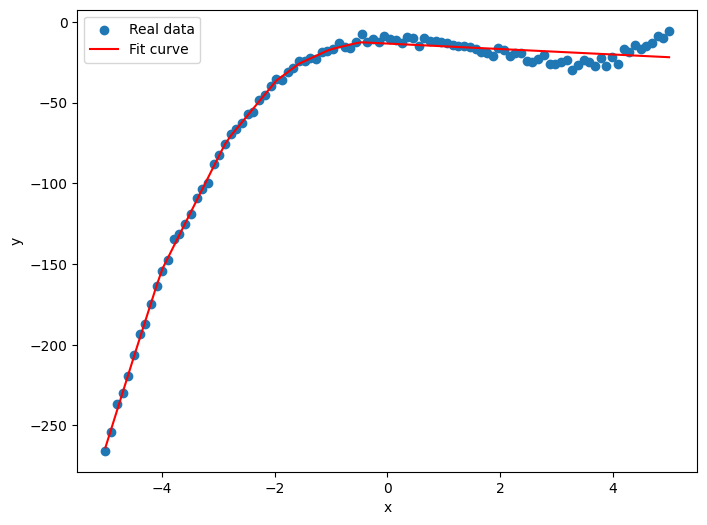

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
torch.manual_seed(16) #for fixed model
def generate_quadratic_data(num_samples):
    x = torch.linspace(-5, 5, num_samples)
    y = 1*x**3 - 5*x**2 + x - 10 + torch.randn(num_samples) * 2
    return x, y

# 產生資料集
num_samples = 100
x, y = generate_quadratic_data(num_samples)
print (x.shape)
print (y.shape)

# 設定 model
model = torch.nn.Sequential(
    torch.nn.Linear(1, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)
# Create an optimizer
criterion = nn.MSELoss()  # Mean squared error loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



# Train the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward propagation
    outputs = model(x.unsqueeze(1)) #Increase dimensions
    loss = criterion(outputs, y.unsqueeze(1)) #Increase dimensions
    # or loss = criterion(outputs.squeeze(), y)
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')



# Plot the fitted curve
model.eval()
with torch.no_grad():
    x_test = torch.linspace(-5, 5, 100)
    y_pred = model(x_test.unsqueeze(1))

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), label='Real data')
plt.plot(x_test.numpy(), y_pred.numpy(), 'r-', label='Fit curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Output fitted parameters
#print(f"Fitted parameters：a={optimizer[0]:.2f}, b={optimizer[1]:.2f}, c={optimizer[2]:.2f}, d={optimizer[3]:.2f}")
#print(f"Fitted parameters：a={optimizer[0]:.2f}, b={optimizer[1]:.2f}, c={optimizer[2]:.2f}")